In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = sns.load_dataset("iris")

In [21]:
datac = data.copy()

In [23]:
datac 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
fv = datac.iloc[:,0:-1]
cv = datac.iloc[:,-1]

In [27]:
fv

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
cv = cv.map({"setosa":0,"versicolor":1,"virginica":2})

In [31]:
cv

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [33]:
import sklearn
import pandas as pd

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,random_state = 1) # Random spliting #To avoid shufffling of datapoint we use random_state

In [39]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,stratify = cv) # Stratified random spliting

In [41]:
x_train.shape

(120, 4)

In [43]:
x_test.shape

(30, 4)

In [45]:
y_train.shape

(120,)

In [47]:
y_test.shape

(30,)

### Training

In [50]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [52]:
knn =  KNeighborsClassifier(n_neighbors = 1) # we have cretae a 1-nn alogarthim

In [54]:
model = knn.fit(x_train,y_train)

### Testing

In [57]:
y_cap = model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

### Finding Accuracy

In [62]:
accuracy_score(y_test,y_cap)

0.9333333333333333

In [64]:
acc = []
k = []
for k1 in range(1,121,2):
    knn = KNeighborsClassifier(n_neighbors = k1)
    model = knn.fit(x_train,y_train)

    y_cap = model.predict(x_test)

    acc.append(accuracy_score(y_test,y_cap))
    k.append(k1)

Text(0, 0.5, 'Accuracy')

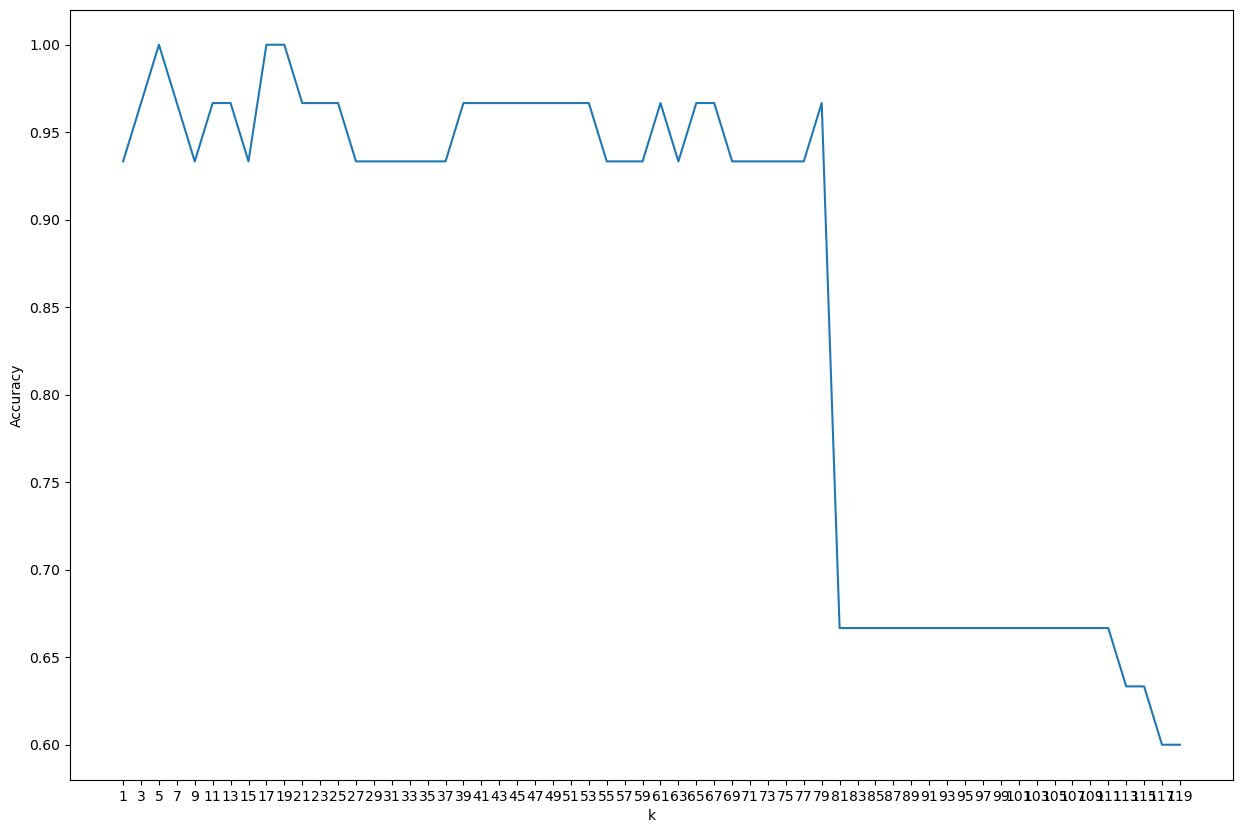

In [65]:
plt.figure(figsize =(15,10))
sns.lineplot(x = k,y = acc)
plt.xticks(k)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [68]:
knn5 =  KNeighborsClassifier(n_neighbors = 5)

In [70]:
model1 = knn5.fit(x_train,y_train)

In [72]:
y_cap1 = model1.predict(x_test)

In [74]:
accuracy_score(y_test,y_cap1)

1.0

#### D_train,D_CV,D_test

In [77]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,stratify = cv)
x_trainf,x_cv,y_trainf,y_cv = train_test_split(x_train,y_train,test_size = 0.2,stratify = y_train)

In [79]:
x_trainf.shape

(96, 4)

In [81]:
a = []
K = []
for k1 in range(1,97,2):
    knn =  KNeighborsClassifier(n_neighbors = k1)
    model = knn.fit(x_trainf,y_trainf)

    y_cap1 = model.predict(x_cv)
    a.append(accuracy_score(y_cv,y_cap1))
    K.append(k1)

Text(0, 0.5, 'Accuracy')

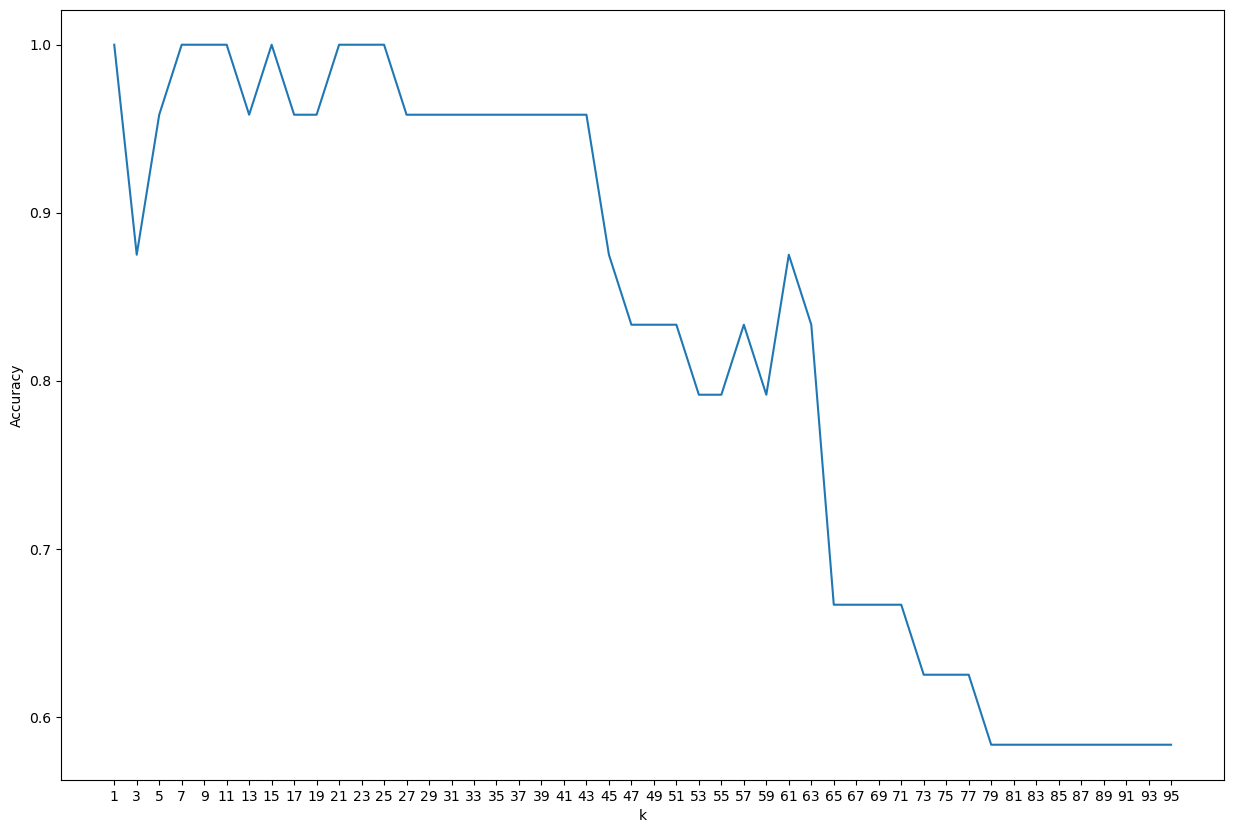

In [82]:
plt.figure(figsize =(15,10))
sns.lineplot(x = K,y = a)
plt.xticks(K)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [84]:
knn =  KNeighborsClassifier(n_neighbors = 27)

In [87]:
model = knn.fit(x_train,y_train)

In [89]:
y_cap = model.predict(x_test)

In [91]:
y_cap

array([1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 1, 2, 2, 0], dtype=int64)

In [93]:
accuracy_score(y_test,y_cap)

0.9666666666666667

### Stratified K-fold cross validation --Classification
### K-fold cross validation -- Regression

In [96]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size = 0.2,stratify = cv)

In [98]:
from sklearn.model_selection import cross_val_score,cross_validate

In [100]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [106]:
cross_val_score(estimator = knn,X = x_train, y= y_train,cv = 3,scoring = "accuracy").mean()

0.9166666666666666

In [153]:
# No.of train point will be equal to (d_train/cv)*(cv-1)
acc = []
K = []
for k1 in range(1,91,2):
    knn = KNeighborsClassifier(n_neighbors = k1)
    acc.append(cross_val_score(estimator = knn,X = x_train, y= y_train,cv = 4,scoring = "accuracy").mean())
    K.append(k1)

Text(0, 0.5, 'Accuracy')

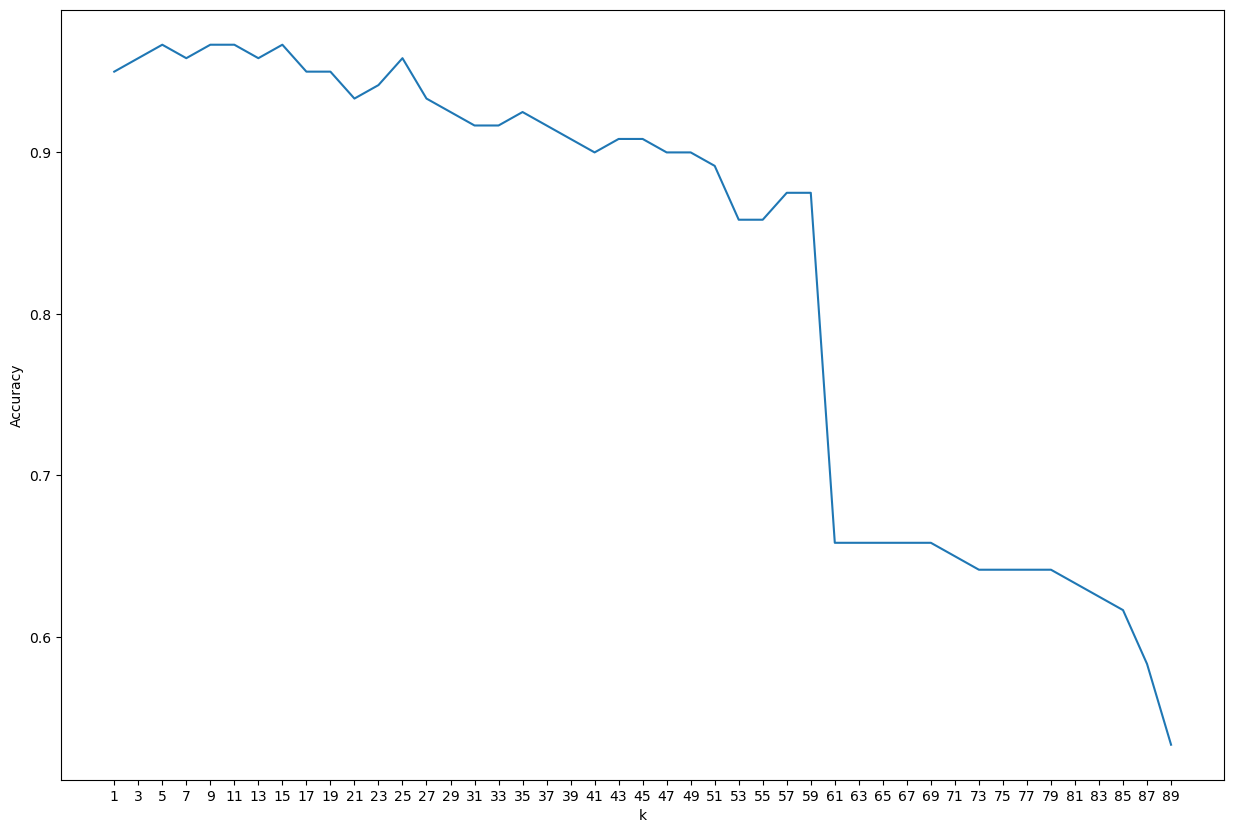

In [155]:
plt.figure(figsize =(15,10))
sns.lineplot(x = K,y = acc)
plt.xticks(K)
plt.xlabel("k")
plt.ylabel("Accuracy")

In [157]:
knn =  KNeighborsClassifier(n_neighbors = 7)

In [159]:
model = knn.fit(x_train,y_train)

In [161]:
y_cap = model.predict(x_test)

In [163]:
accuracy_score(y_test,y_cap)

0.9666666666666667